In [1]:
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_style("whitegrid")
from collections import defaultdict
from numpy import mean
from numpy import std
import shap
import time
import numpy as np
import pandas as pd
import scipy.io as sio
from scipy.fftpack import fft
from IPython.display import display
from scipy import stats
import scipy.stats
import itertools
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [11]:
def run_test(X_train,y_train, X_test, y_test):
  
   
    clf = ExtraTreesClassifier(n_estimators=1000, random_state=13, criterion ='gini')
    
    #fit the model on training data 
    clf.fit(X_train, y_train)
    
    #predict the on the test set
    y_pred = clf.predict(X_test)
    
    #create output of predictions
    predictions = pd.DataFrame(y_pred, columns = ['ouput'])
    predictions["y_true_value"] = y_test.values
    predictions['model'] = 'Extra Trees'

    
    #calculate test score 
    test_score = accuracy_score(y_test,y_pred)
    
    #calculate precision score
    precision = precision_score(y_test, y_pred, average='binary')
    
    #calculate recall 
    recall = recall_score(y_test, y_pred, average='binary')
    
    #calculate F score
    f_score = f1_score(y_test, y_pred, average='binary')
    
    # predict probabilities
    cl_probs = clf.predict_proba(X_test)
    
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    
    # keep probabilities for the positive outcome only
    cl_probs = cl_probs[:, 1]
    
    # calculate auc scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    cl_auc = roc_auc_score(y_test, cl_probs)
    
    # summarize auc scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Extra Trees: ROC AUC=%.3f' % (cl_auc))
    
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, cl_probs)
    
    # plot the roc curve for the model
    
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label= 'Extra Trees')
    
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    
    # show the legend
    pyplot.legend()
    
    #titles
    plt.title("Extra Trees ROC Curve")
    
    #save the plt
    plt.savefig('ExtraTrees_final_competition.png')
    
    # show the plot
    pyplot.show()

    
    #print confusion matrix 
    cm = confusion_matrix(y_test, y_pred)
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels([ 'interical', 'preictal']); ax.yaxis.set_ticklabels(['interictal', 'preictal']);
    plt.savefig('Confusion_matrix_competition.png')
    
    print("\nThe Accuracy Score is {}".format(test_score),
         "\nThe Precision Score is {}".format(precision),
         "\nThe Recall Score is {}".format(recall),
         "\nThe F Score is {}".format(f_score))
    
    return predictions

In [12]:
#load training data

train_data = pd.read_csv("train_full_corr_all.csv")

#drop recording labels for modeling 
cols = ['Recording']
train_df = train_data.drop(cols, axis=1)

#create dummy variable for y 

train_df = pd.get_dummies(train_df, drop_first=True)

#create X and y 

X_train = train_df.drop('y_preictal', axis = 1)
y_train = train_df['y_preictal']

In [13]:
#load test data

test_data = pd.read_csv("test_full_corr_all.csv")

#drop recording labels for modeling 
cols = ['Recording']
test_df = test_data.drop(cols, axis=1)

#create dummy variable for y 

test_df = pd.get_dummies(test_df, drop_first=True)

#create X and y 

X_test = test_df.drop('y_preictal', axis = 1)
y_test = test_df['y_preictal']

No Skill: ROC AUC=0.500
Extra Trees: ROC AUC=0.937


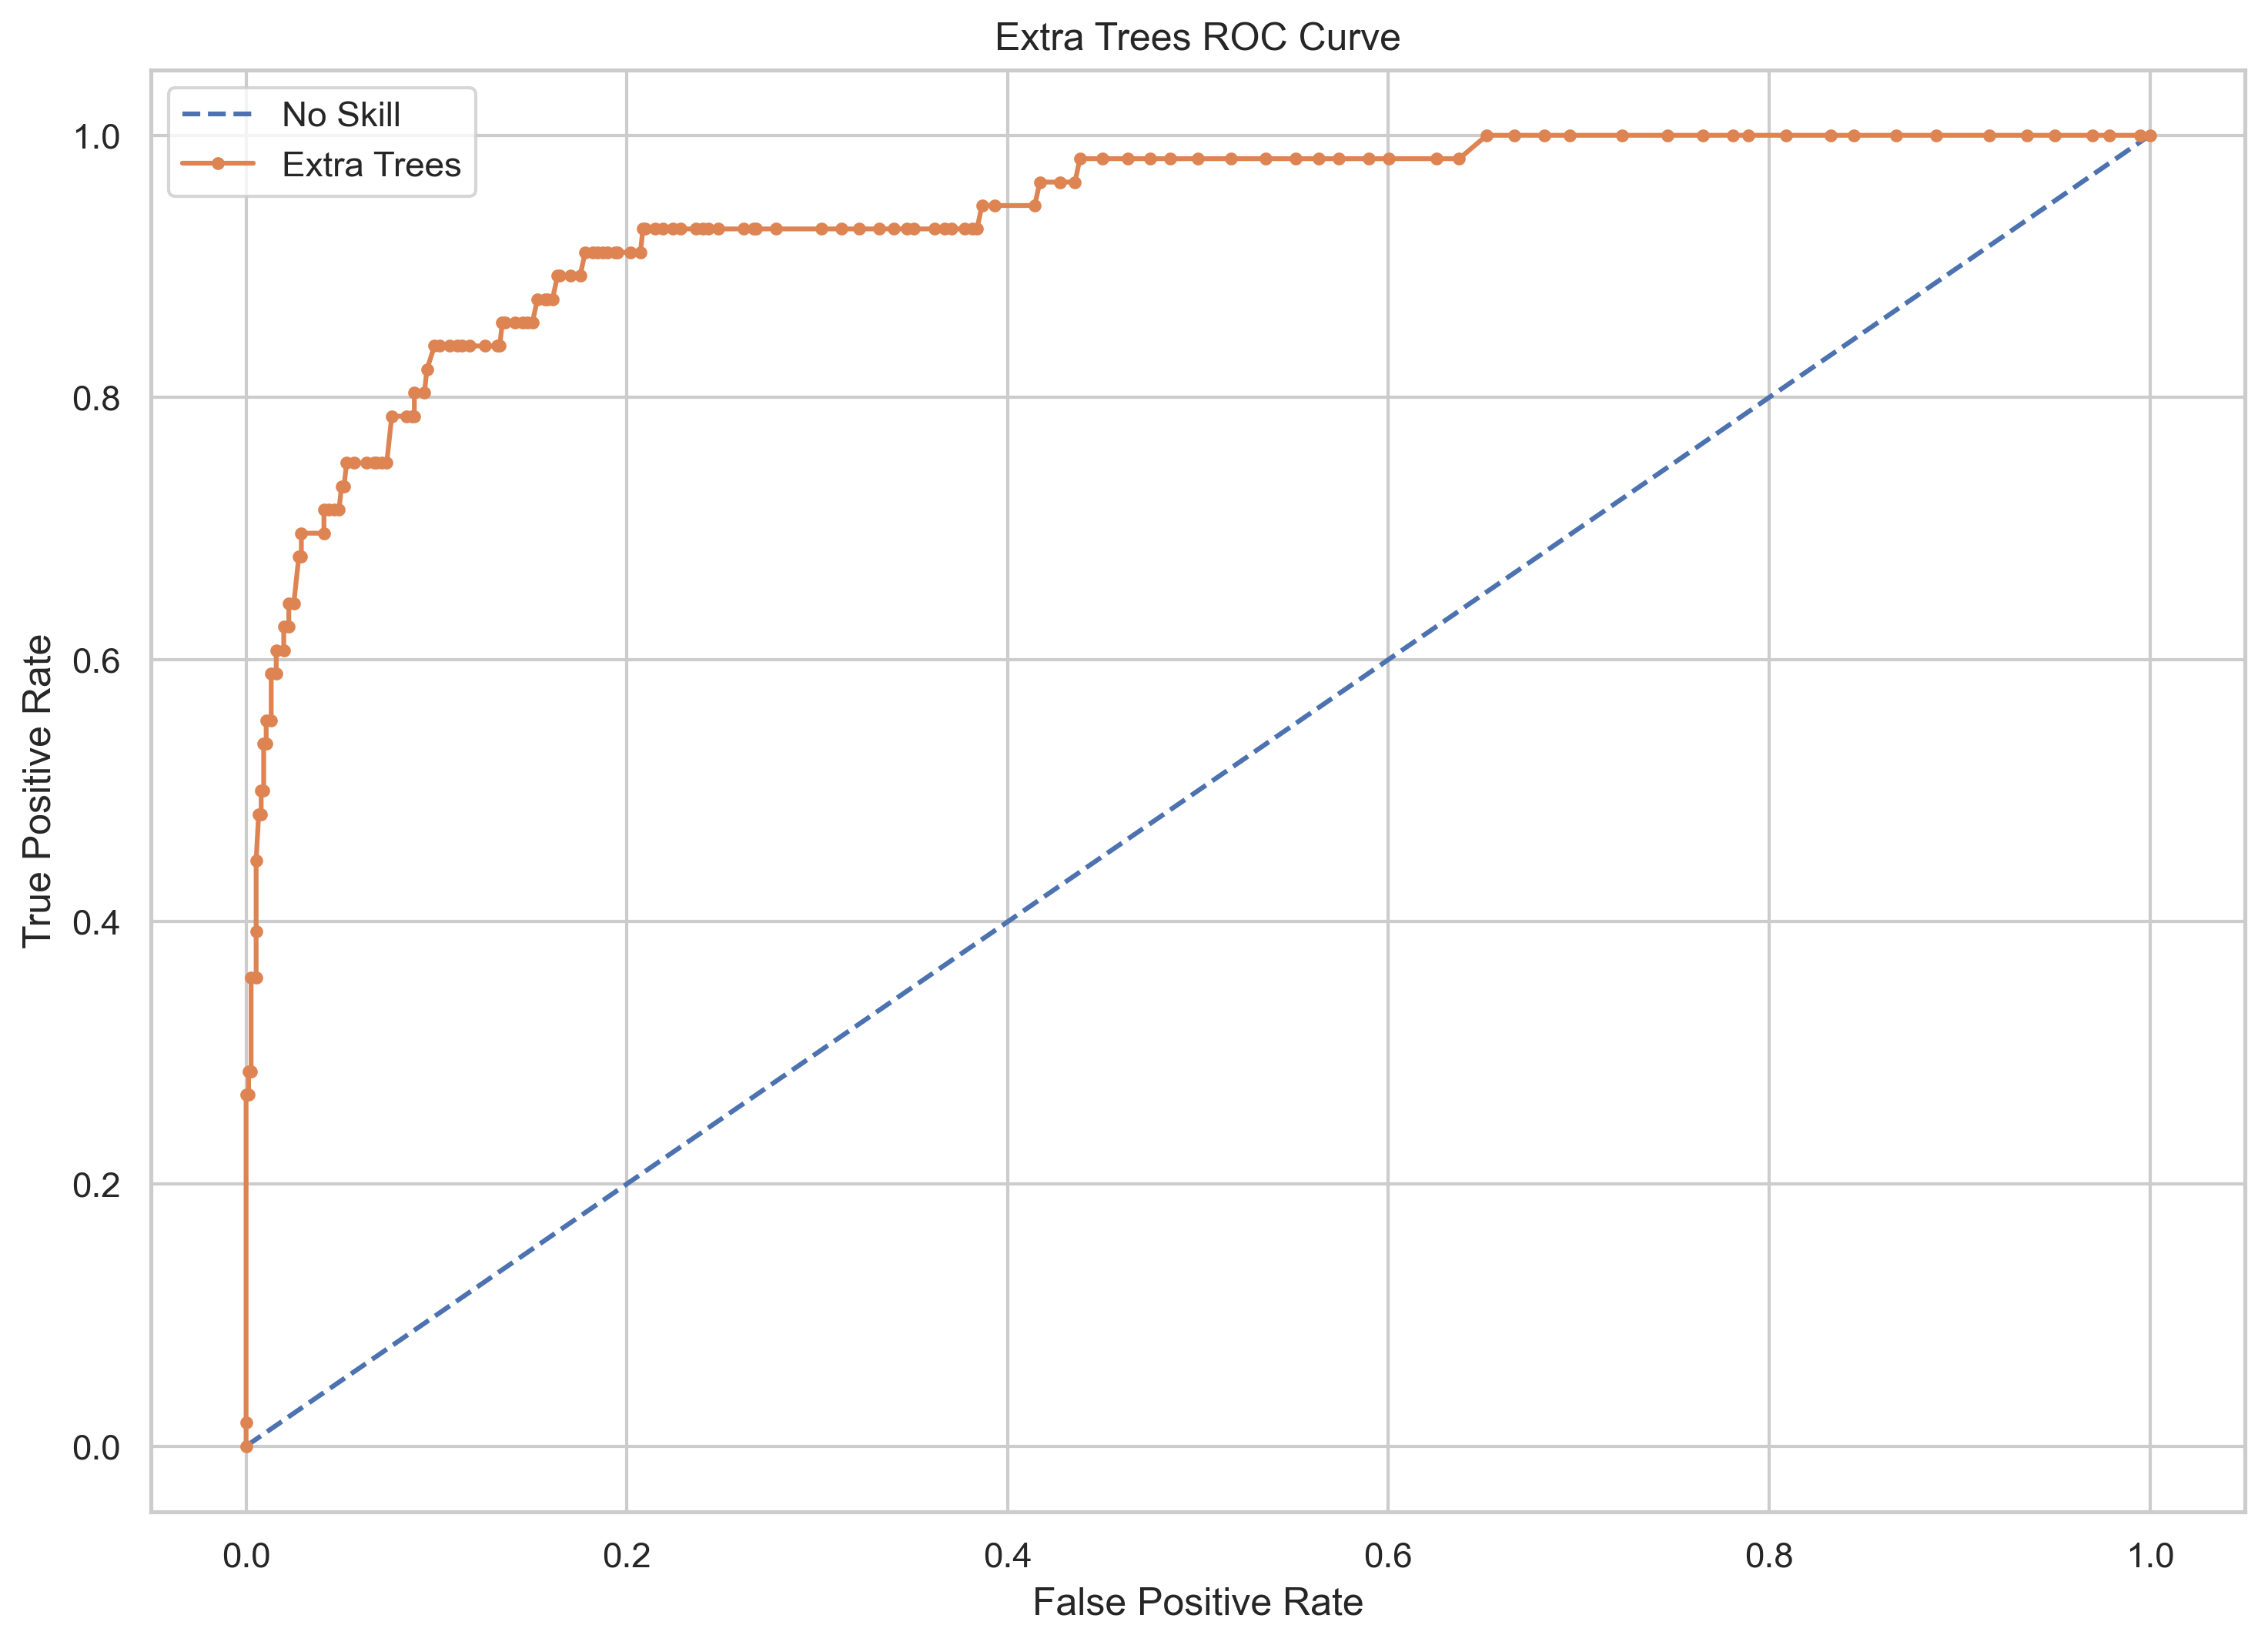


The Accuracy Score is 0.9484029484029484 
The Precision Score is 0.9375 
The Recall Score is 0.26785714285714285 
The F Score is 0.41666666666666663


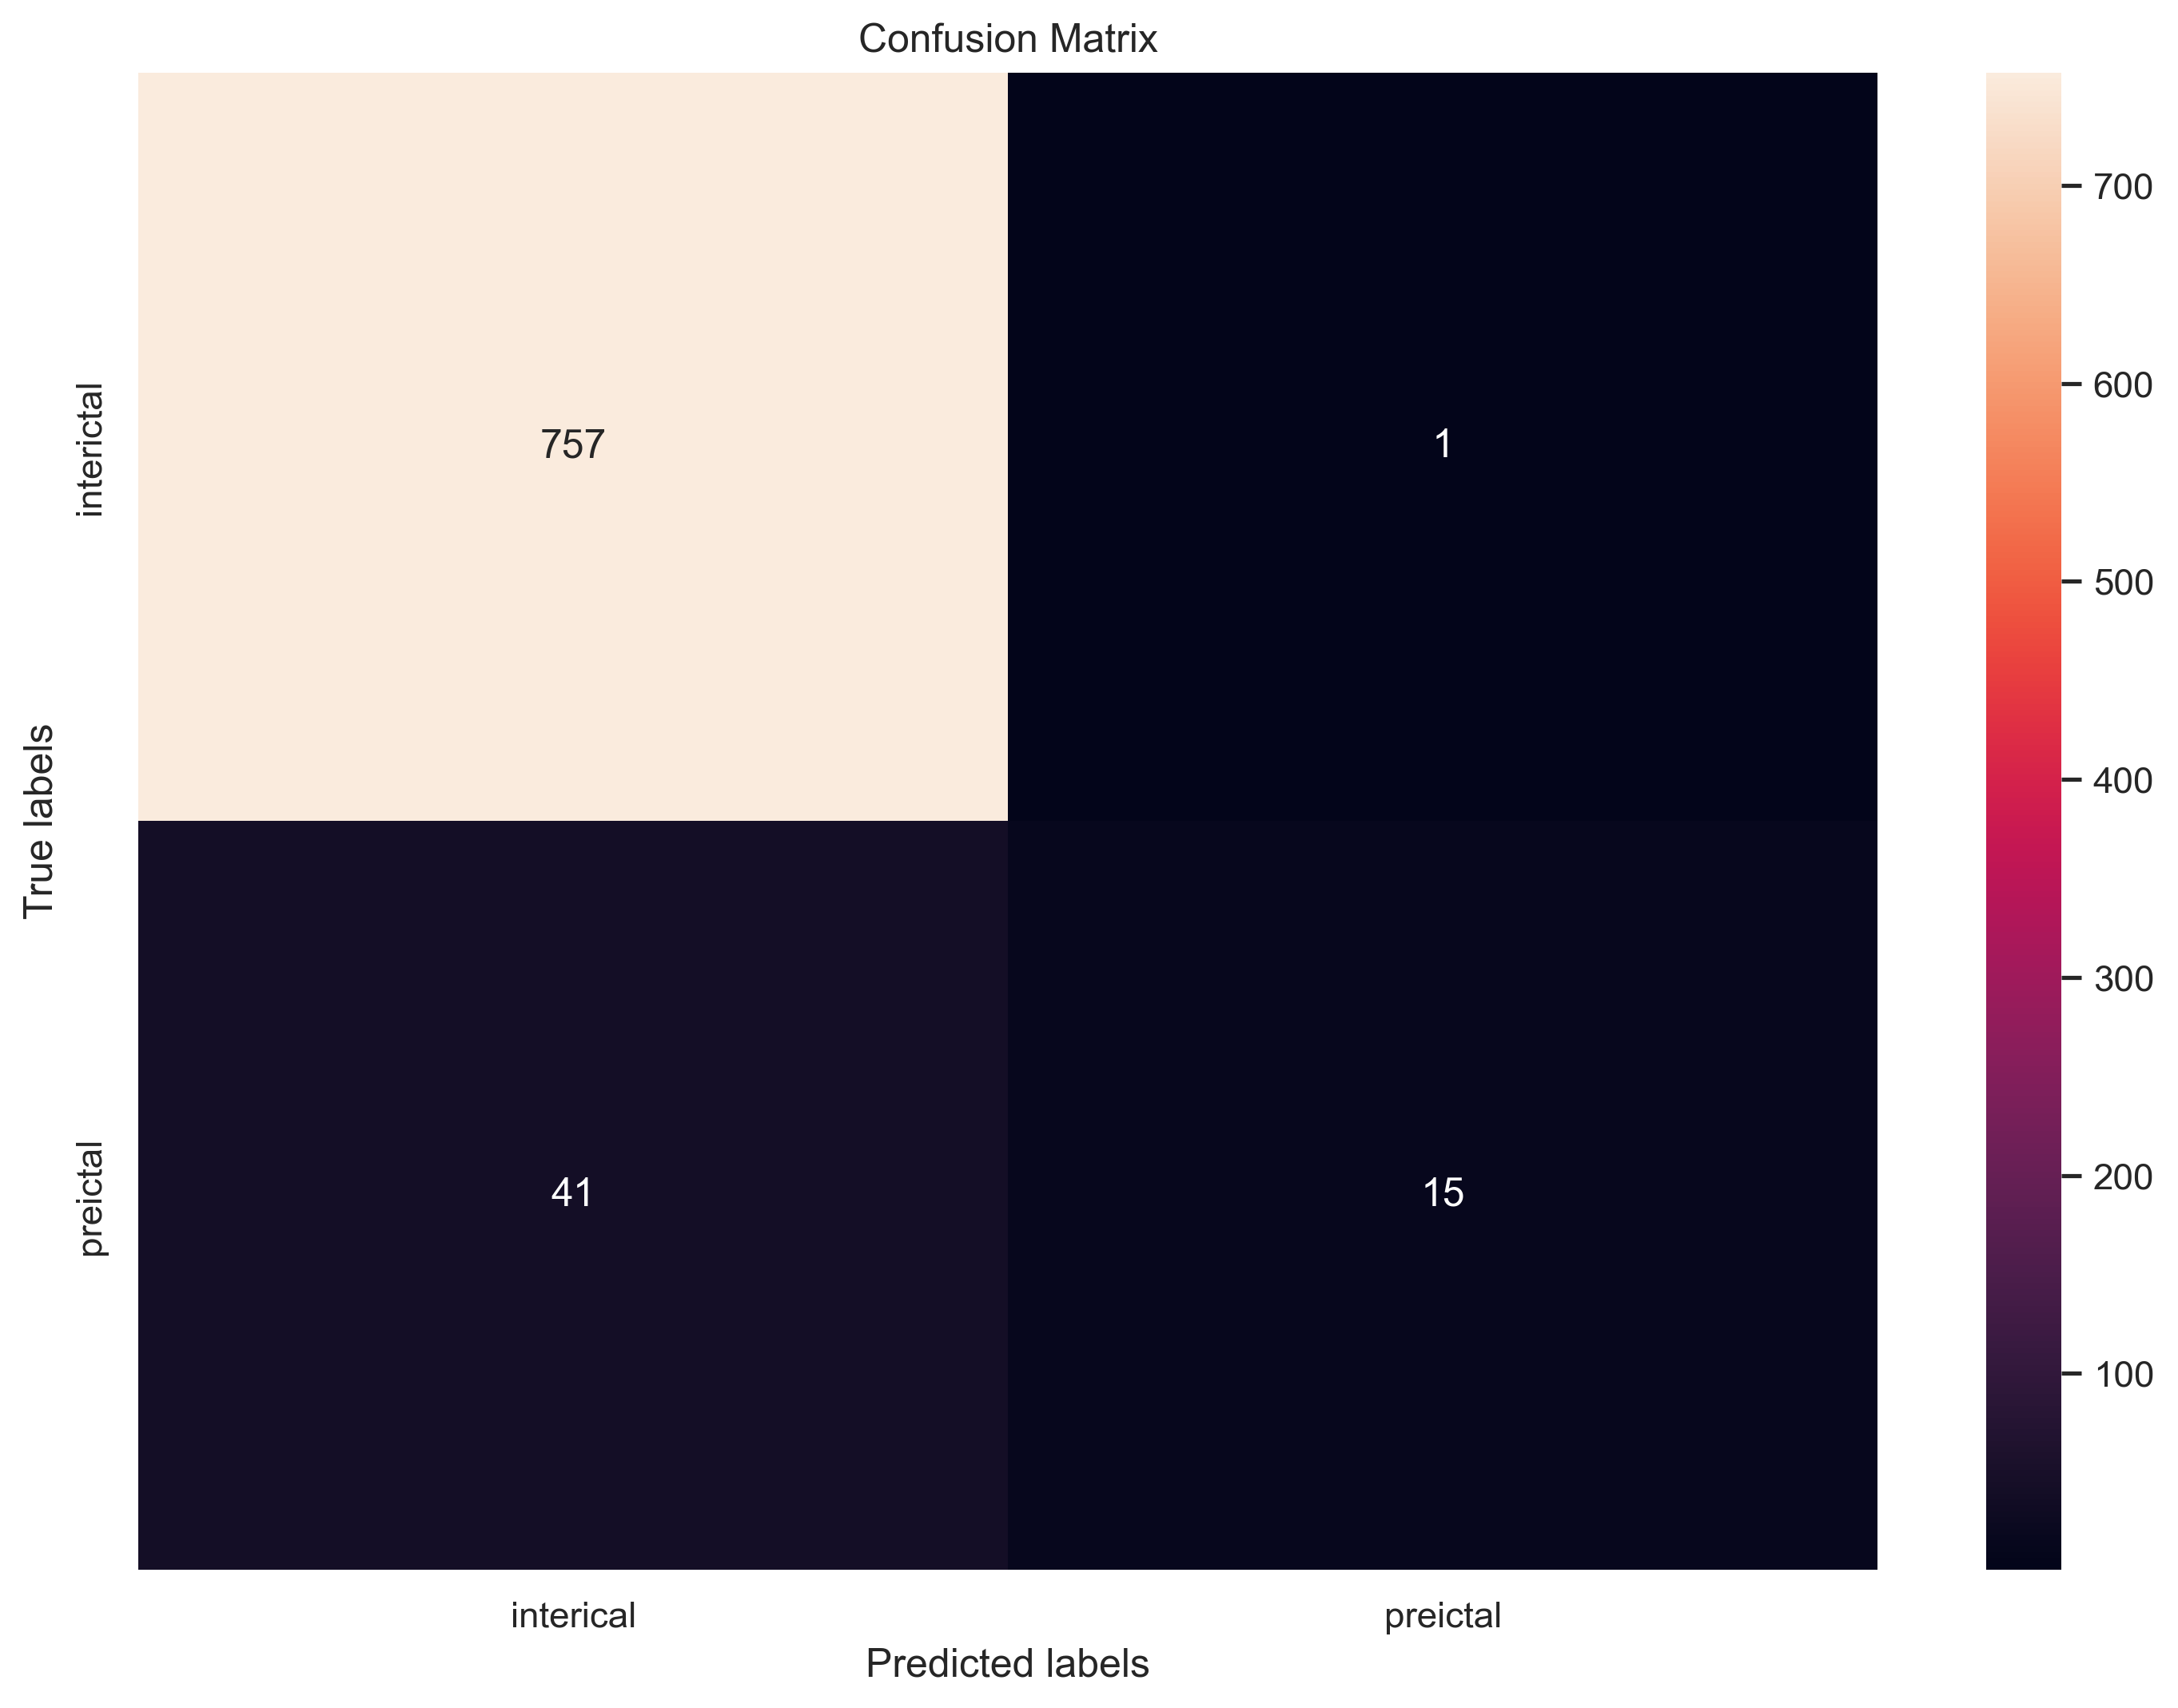

In [14]:
ExtraTrees_final = run_test(X_train, y_train, X_test, y_test)

In [15]:
ExtraTrees_final

,ouput,y_true_value,model
0,0,0,Extra Trees
1,0,0,Extra Trees
2,0,0,Extra Trees
3,0,0,Extra Trees
4,0,0,Extra Trees
...,...,...,...
809,0,0,Extra Trees
810,0,0,Extra Trees
811,0,0,Extra Trees
812,0,0,Extra Trees


In [16]:
ExtraTrees_final.to_csv("val_predictions.csv", index=False)

In [17]:
#combine train and val 
frames = [train_df,test_df]
train_data = pd.concat(frames)


#create dummy variable for y 

train_df = pd.get_dummies(train_df, drop_first=True)

#create X and y 

X_train = train_df.drop('y_preictal', axis = 1)
y_train = train_df['y_preictal']



In [18]:
#load test data

test_data = pd.read_csv("final_test_set.csv")

#drop recording labels for modeling 
cols = ['Recording']
test_df = test_data.drop(cols, axis=1)


#create X and y 

X_test = test_df.drop('preictal', axis = 1)
y_test = test_df['preictal']

No Skill: ROC AUC=0.500
Extra Trees: ROC AUC=0.671


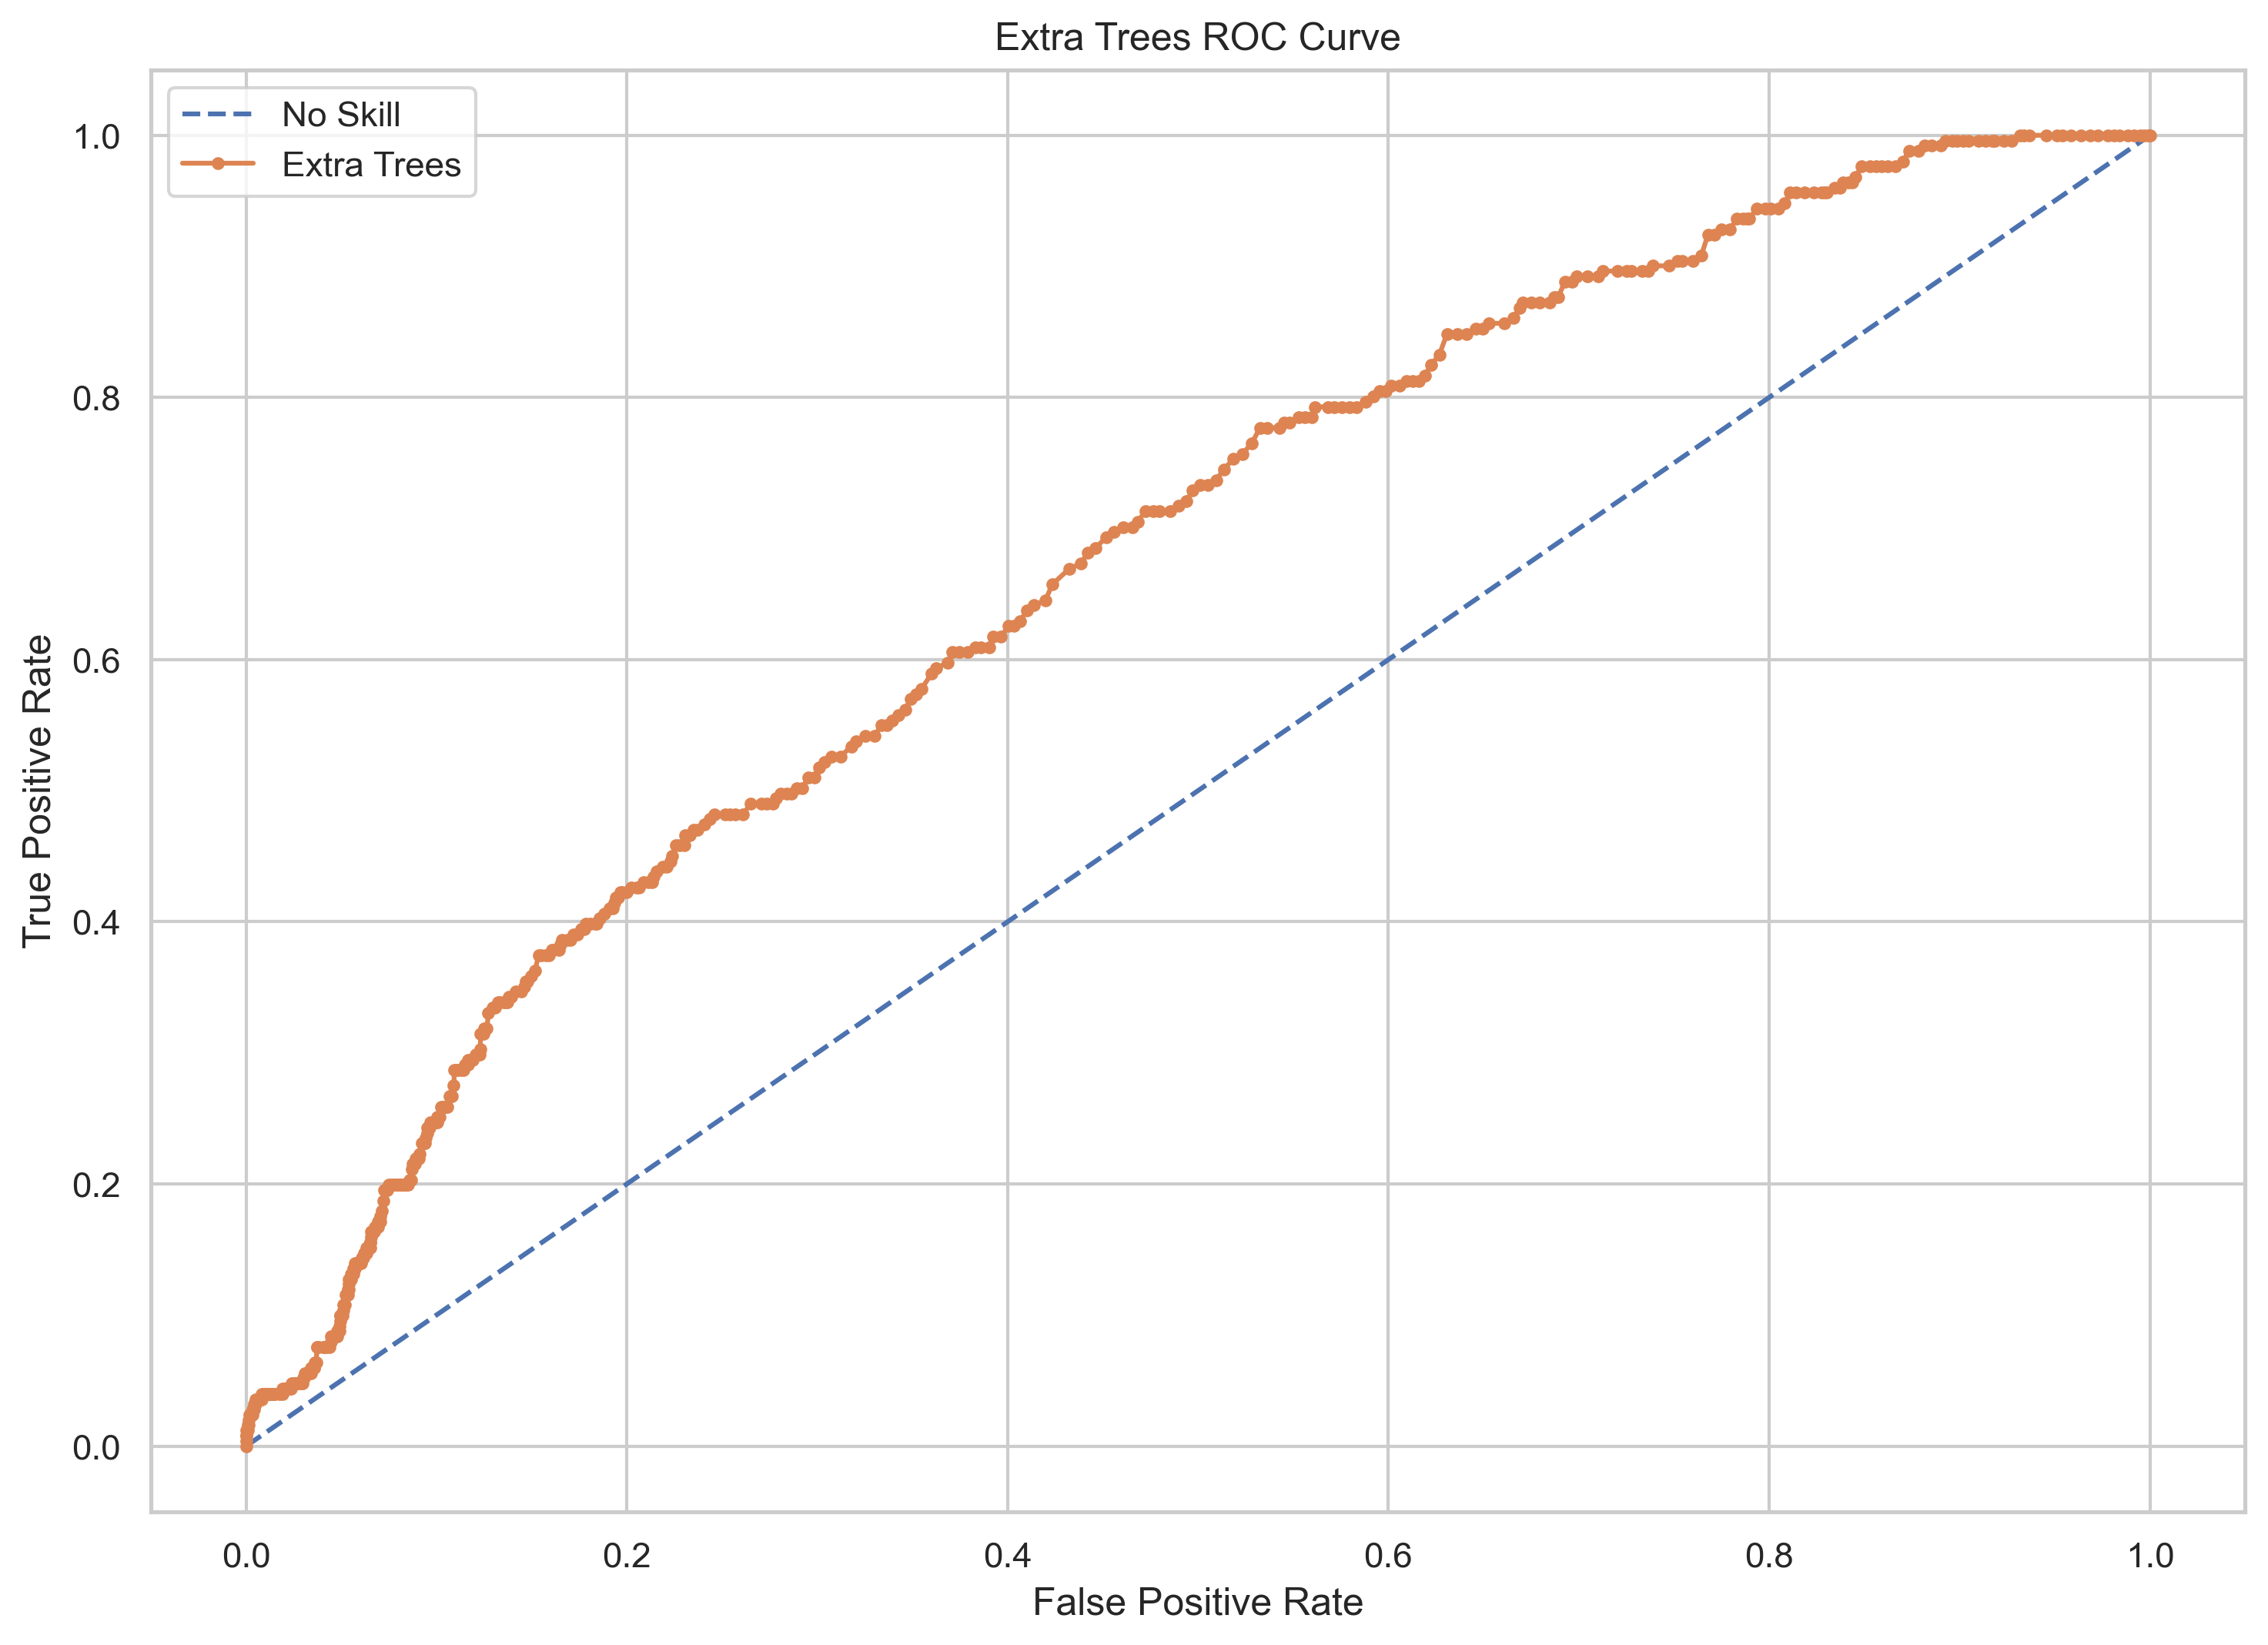


The Accuracy Score is 0.8963151207115629 
The Precision Score is 0.10945273631840796 
The Recall Score is 0.08764940239043825 
The F Score is 0.09734513274336284


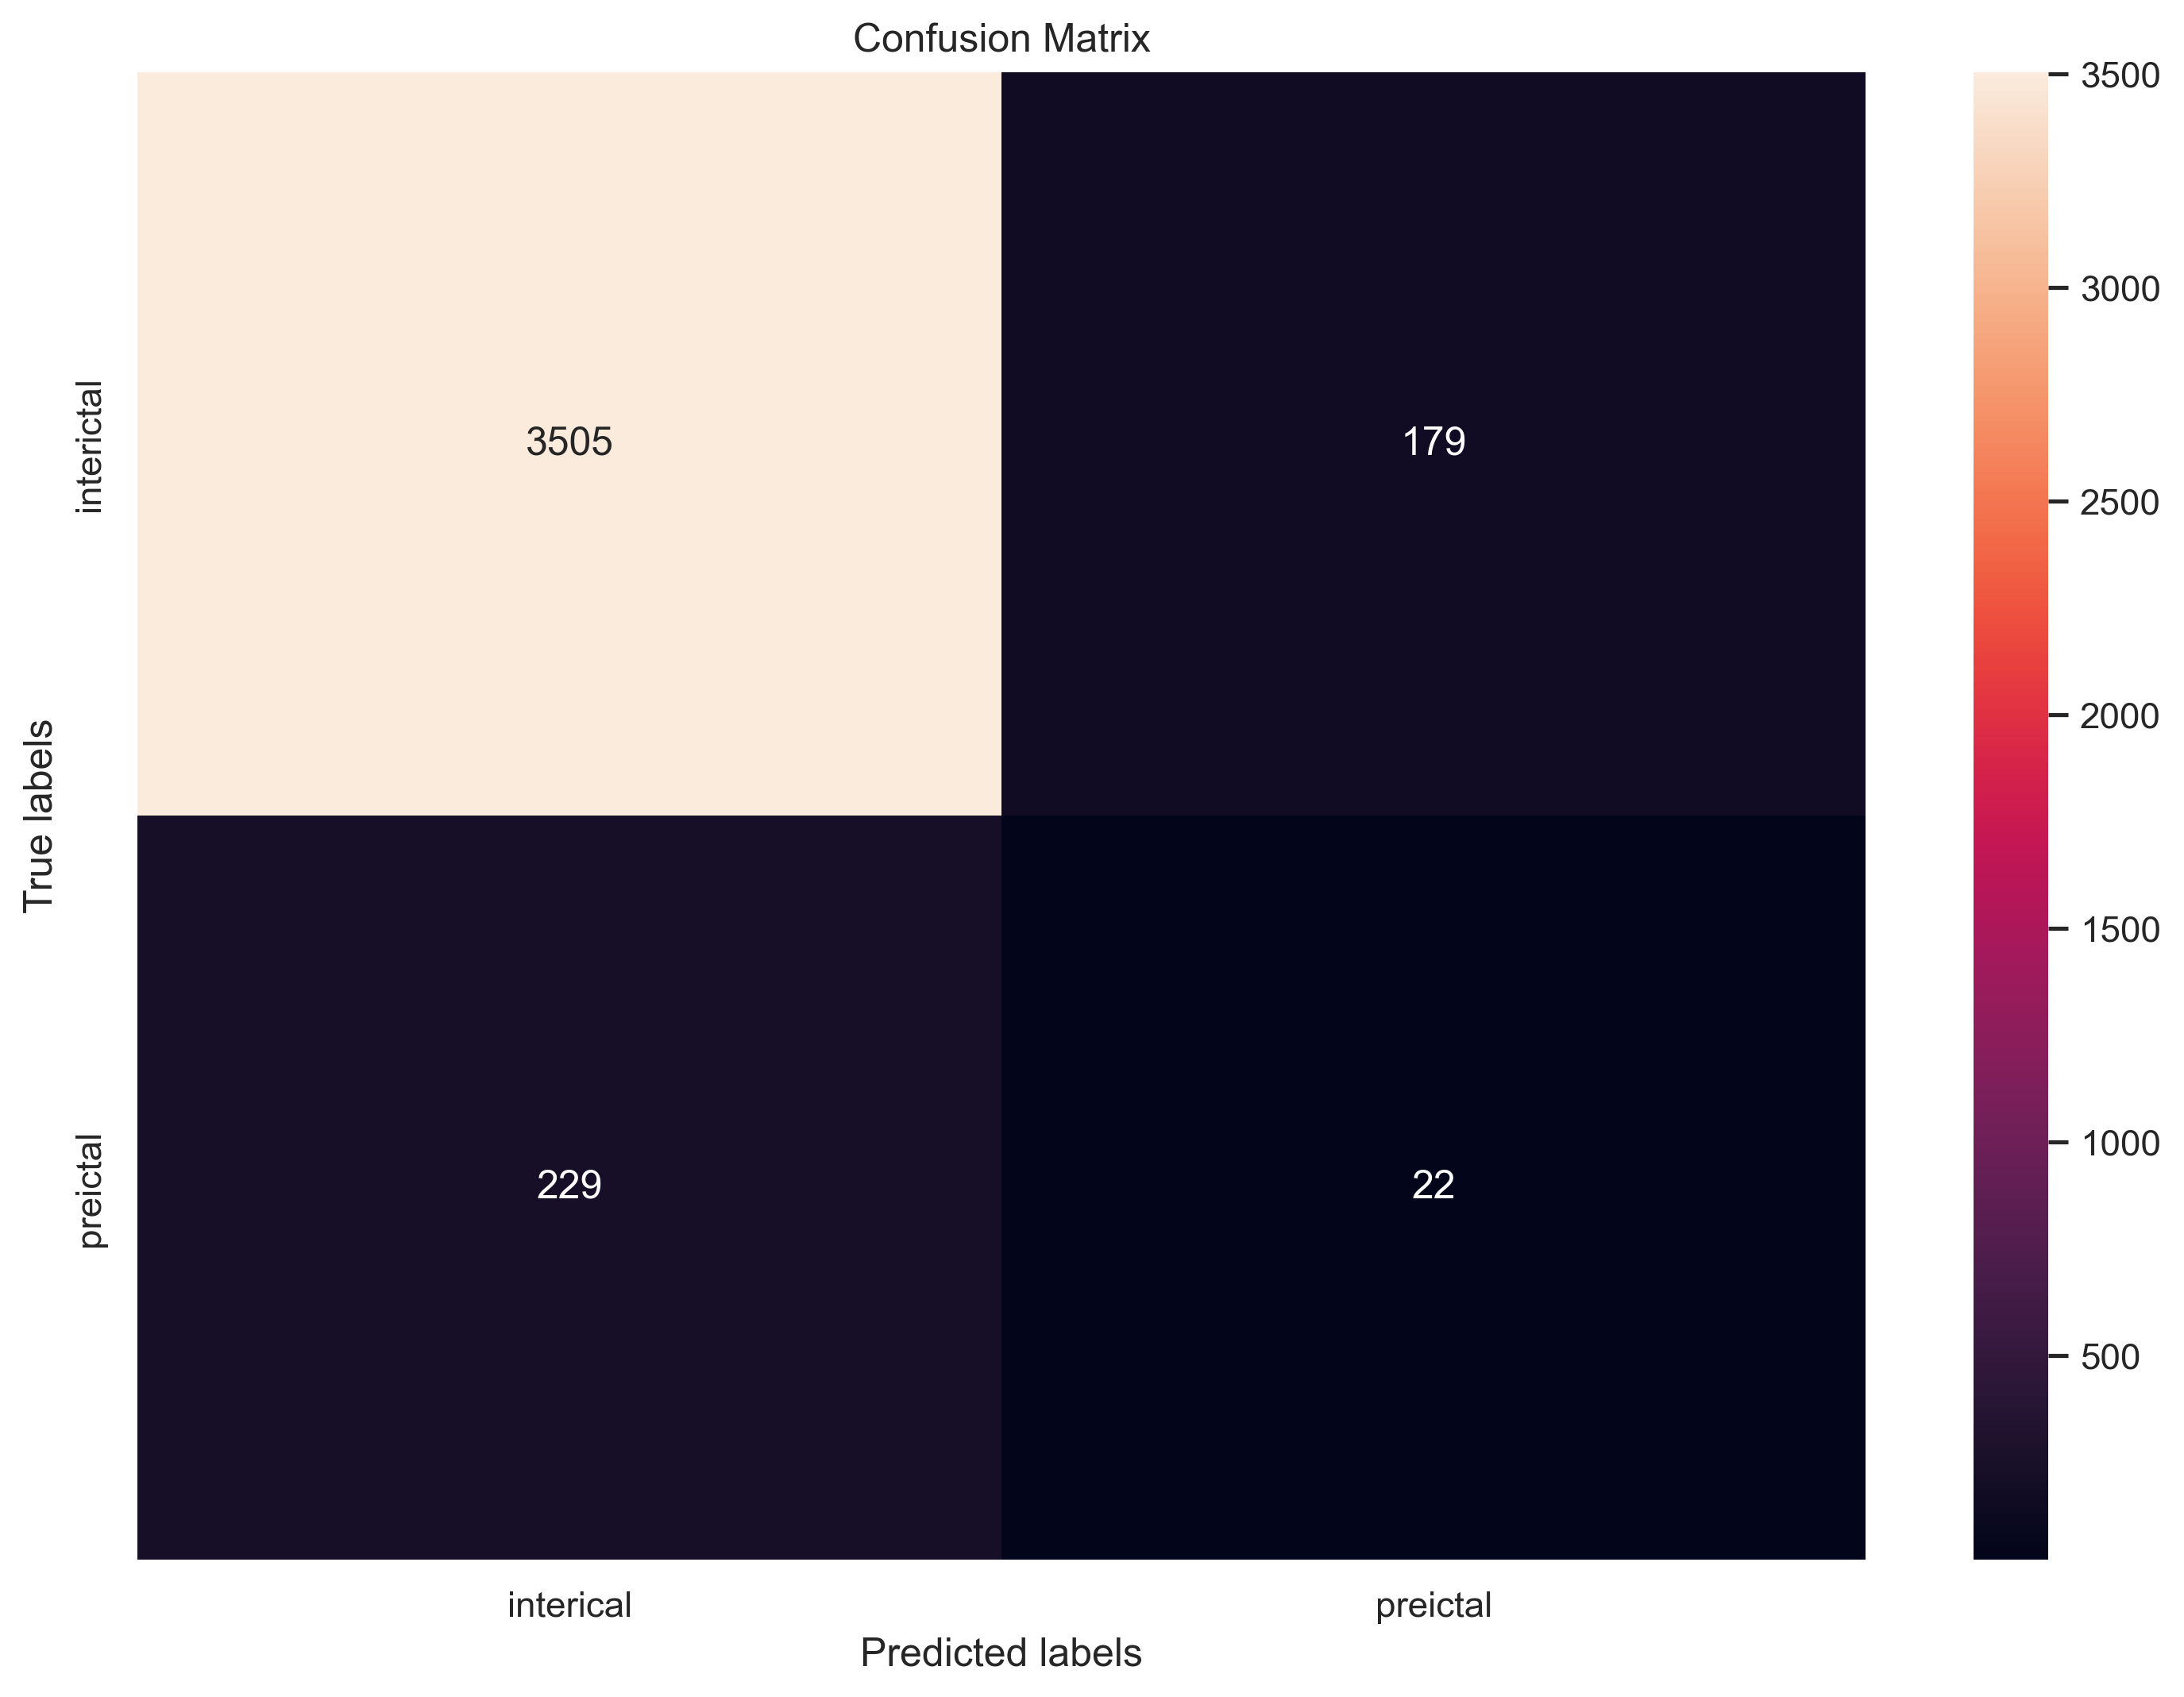

In [19]:
ExtraTrees_competition = run_test(X_train, y_train, X_test, y_test)